<a href="https://colab.research.google.com/github/Fredooooooo/JSC270_Assg4/blob/main/JSC270_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
api_key = 'RnHS3Y3lkrv9pzkHVFcVYVArH'
api_secret_key = 'xLMxTxhEHluPlcsPgb2rur07hBR4qSuzGdIVhJg0hpEiR1nTBm'
access_key = '1376070608950267904-AlJkcNLLxsAByp9NmFU854synmuzq5'
access_secret = 'dtH18I0v8Ob44BAUXhrJB9TNvnFfQykBafXY4fl4JtdJB'

In [3]:
import re
import numpy as np
import pandas as pd 
import io
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

In [25]:
import tweepy as tw
# Use credentials to authorize access
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)
search_words = ' -filter:retweets'
date_since = "2021-03-09"

#Collect tweets (here, I get only 20)
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(2000)

# The result is an iterable
a = []
b = []
for tweet in tweets:
  a.append(tweet.text)
  b.append(tweet.user.followers_count)

In [26]:
import pandas as pd
import re

# tweet_list = [tweet.text for tweet in tweets]
df = pd.DataFrame(a, columns = ['tweet'])
df['followers'] = b
print(df.count())

tweet        2000
followers    2000
dtype: int64


In [27]:
handle_regex = '@[A-Za-z|0-9|_]+'

d = []
for row in df['tweet']:
  d.append(re.sub(handle_regex,'', row))

df['tweet'] = d
df.head()

,tweet,followers
0,No. Activate chief. It’s obvious that he sai...,16
1,Woah lol we suppose to be on the same team ch...,1683
2,i know donghan wears contacts sometimes but li...,1980
3,I hear you adopted that kitty. So I’ll give i...,81
4,The X-men analyzer has logged on.,93


In [28]:
c = []
for x in df['followers']:
  if 0 <= x <= 100:
    c.append(0)
  elif 100 < x <= 10000:
    c.append(1)
  else:
    c.append(2)
df['labels'] = c
df.head()

,tweet,followers,labels
0,No. Activate chief. It’s obvious that he sai...,16,0
1,Woah lol we suppose to be on the same team ch...,1683,1
2,i know donghan wears contacts sometimes but li...,1980,1
3,I hear you adopted that kitty. So I’ll give i...,81,0
4,The X-men analyzer has logged on.,93,0


In [29]:
low_proportion = df['labels'].tolist().count(0)
medium_proportion = df['labels'].tolist().count(1)
high_proportion = df['labels'].tolist().count(2)
print(low_proportion, medium_proportion, high_proportion)
print(df.followers.mean)

482 1455 63
<bound method Series.mean of 0         16
1       1683
2       1980
3         81
4         93
        ... 
1995     276
1996      18
1997     448
1998       4
1999      41
Name: followers, Length: 2000, dtype: int64>


In [30]:
import nltk
# Download the tokenizer
nltk.download('punkt')

# Create a new column in our DF that contains token lists instead of raw text
df['tokens'] = df['tweet'].apply(nltk.word_tokenize)

print(df['tokens'].head(5))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0    [No, ., Activate, chief, ., It, ’, s, obvious,...
1    [Woah, lol, we, suppose, to, be, on, the, same...
2    [i, know, donghan, wears, contacts, sometimes,...
3    [I, hear, you, adopted, that, kitty, ., So, I,...
4           [The, X-men, analyzer, has, logged, on, .]
Name: tokens, dtype: object


In [31]:
##### Convert tokens into lowercase ####
lowercase_tokens = []
# Create a list of lists with what we want
for row in df['tokens']:
  lowercase_tokens.append([t.lower() for t in row])
# add the new info to our df
df['lowercase_tokens'] = lowercase_tokens

print(df['lowercase_tokens'].head(5))

0    [no, ., activate, chief, ., it, ’, s, obvious,...
1    [woah, lol, we, suppose, to, be, on, the, same...
2    [i, know, donghan, wears, contacts, sometimes,...
3    [i, hear, you, adopted, that, kitty, ., so, i,...
4           [the, x-men, analyzer, has, logged, on, .]
Name: lowercase_tokens, dtype: object


In [32]:
##### Let's remove punctuation #####

# Note we've been keeping different columns for different steps (not necessary)
list(df)

# Same process as before
tokens_no_punct = []
# Create a list of lists with what we want
for row in df['lowercase_tokens']:
  tokens_no_punct.append([re.sub('[^\w\s]','', t) for t in row])
# add the new info to our df
df['tokens_no_punct'] = tokens_no_punct

print(df['tokens_no_punct'].head(5))

0    [no, , activate, chief, , it, , s, obvious, th...
1    [woah, lol, we, suppose, to, be, on, the, same...
2    [i, know, donghan, wears, contacts, sometimes,...
3    [i, hear, you, adopted, that, kitty, , so, i, ...
4             [the, xmen, analyzer, has, logged, on, ]
Name: tokens_no_punct, dtype: object


In [33]:
##### Time to remove Stopwords #####
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')[:75]
tokens_no_sw = []
for row in df['tokens_no_punct']:
  tokens_no_sw.append([w for w in row if w not in sw])
# Add column to df
df['tokens_no_sw'] = tokens_no_sw

# Print some examples
print(df['tokens_no_sw'].head(5))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0    [no, , activate, chief, , , s, obvious, said, ...
1    [woah, lol, suppose, to, on, same, team, chill...
2    [know, donghan, wears, contacts, sometimes, li...
3    [hear, adopted, kitty, , so, , ll, give, to, y...
4                       [xmen, analyzer, logged, on, ]
Name: tokens_no_sw, dtype: object


In [34]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmed_tokens = []
for row in df['tokens_no_sw']:
  stemmed_tokens.append([stemmer.stem(t) for t in row])

df['stemmed_tokens'] = stemmed_tokens
print('Before stemming:\n', df['tokens_no_sw'].head(3))
print('After stemming:\n', df['stemmed_tokens'].head(3))

Before stemming:
 0    [no, , activate, chief, , , s, obvious, said, ...
1    [woah, lol, suppose, to, on, same, team, chill...
2    [know, donghan, wears, contacts, sometimes, li...
Name: tokens_no_sw, dtype: object
After stemming:
 0    [no, , activ, chief, , , s, obviou, said, , , ...
1    [woah, lol, suppos, to, on, same, team, chill,...
2    [know, donghan, wear, contact, sometim, like, ...
Name: stemmed_tokens, dtype: object


In [35]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lem_tokens = []
for row in df['tokens_no_sw']:
  lem_tokens.append([lemmatizer.lemmatize(t) for t in row])

df['lem_tokens'] = lem_tokens

# Print results
print(df['lem_tokens'].head(5))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
0    [no, , activate, chief, , , s, obvious, said, ...
1    [woah, lol, suppose, to, on, same, team, chill...
2    [know, donghan, wear, contact, sometimes, like...
3    [hear, adopted, kitty, , so, , ll, give, to, y...
4                       [xmen, analyzer, logged, on, ]
Name: lem_tokens, dtype: object


In [36]:
# Drop some intermediate columns
list(df)
df = df.drop(['tokens','lowercase_tokens', 'tokens_no_punct','tokens_no_sw','stemmed_tokens'], axis = 1)

print('After removal:\n', list(df))

# Remove blank tokens
no_blanks = []
for row in df['lem_tokens']:
  no_blanks.append([t for t in row if t != ''])
df['tokens'] = no_blanks

print(df['tokens'].head(5))

# drop the last intermediate column
df = df.drop(['lem_tokens'], axis = 1)

# Now we should have only the label, original text, and cleaned token lists
print('Current Columns:\n',list(df))

After removal:
 ['tweet', 'followers', 'labels', 'lem_tokens']
0    [no, activate, chief, s, obvious, said, s, hater]
1    [woah, lol, suppose, to, on, same, team, chill...
2    [know, donghan, wear, contact, sometimes, like...
3    [hear, adopted, kitty, so, ll, give, to, ya, f...
4                         [xmen, analyzer, logged, on]
Name: tokens, dtype: object
Current Columns:
 ['tweet', 'followers', 'labels', 'tokens']


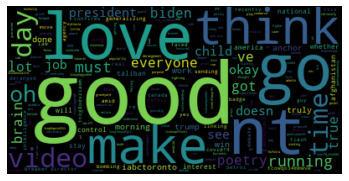

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
popular = df['labels'] > 1
df_pop = df[popular]
text = []
for lst in df_pop['tokens']:
  text.extend(lst)
text = ' '.join(text)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

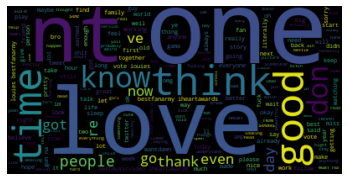

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
popular = df['labels'] == 1
df_less_pop = df[popular]
text = []
for lst in df_less_pop['tokens']:
  text.extend(lst)
text = ' '.join(text)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

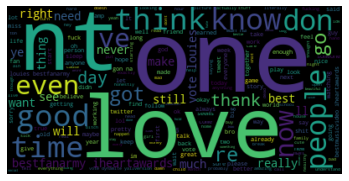

In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
popular = df['labels'] == 1
df_lst_pop = df[popular]
text = []
for lst in df_lst_pop['tokens']:
  text.extend(lst)
text = ' '.join(text)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
df_pop.head()

,tweet,followers,labels,tokens
35,love u more 🤍,14316,2,"[love, u, more]"
44,"Whether America Stays or Goes, the Taliban Wil...",14098,2,"[whether, america, stay, go, taliban, will, co..."
109,"Yes me too, not generalizing, it's just the ...",13121,2,"[yes, too, not, generalizing, s, just, derange..."
165,As long as they don't flash more than their ...,14452,2,"[long, nt, flash, more, than, badge, before, m..."
219,Do you not think the guys petrol bombing a bus...,87732,2,"[not, think, guy, petrol, bombing, bus, in, vi..."


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# Separate labels from features, converting to numpy arrays
X, y = df['tokens'].to_numpy(), df['labels'].to_numpy()


def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None)

# Remember this output is a Scipy Sparse Array
counts = count_vec.fit_transform(X)
print(counts.toarray())

# Print the names of each of the features (1000 total))
print(count_vec.get_feature_names())
# Print this mapping as dictionary
print(count_vec.vocabulary_)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['0', '02', '03', '07', '0x3bc690c604d170bb53c155cb66074b4de1172c36', '1', '10', '100', '1000', '10000', '1015', '105', '108', '10k', '10pm', '11', '1151', '115k', '11th', '12', '1200', '12pm', '13', '13m', '14', '15', '150', '16', '1617831705626', '17', '18', '182713', '1918', '1939', '1st', '2', '20', '2000', '20000', '2008', '2010', '2012', '2019', '2020', '2021', '21', '214148', '21p', '22', '234802650', '234whatsapp', '23april2017', '24', '24h', '2500', '25k', '25m', '27', '28', '29', '2d', '2hrs', '2k', '2nd', '3', '30', '3000', '30mg', '31120', '321321312', '324', '33505', '35', '3590', '39', '3am', '3eyal', '3rd', '4', '40', '400', '42', '425', '428', '437', '47', '47260', '4day', '5', '50', '504', '50k', '52', '5am', '5th', '6', '600', '68', '696c8432', '6am', '7', '70', '70k', '75hard', '7th', '8', '80', '800', '8th', '9', '92', '930', '95', '99', '_', 'a3',

In [40]:
#### TF-IDF Vectorize ####

# Note that smoothing is done by default
tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(counts)

# Let's use the TFIDF counts for modelling
X = tfs.toarray()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# First three rows of training features and labels

Test accuracy with simple Naive Bayes: 0.7275
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.73      1.00      0.84       291
           2       0.00      0.00      0.00         9

    accuracy                           0.73       400
   macro avg       0.24      0.33      0.28       400
weighted avg       0.53      0.73      0.61       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


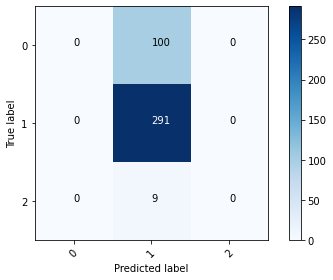

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds))

# fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label = 1)

# plt.plot(fpr,tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operator Characteristic (ROC) Curve for RF')
# plt.show()

labels = [0,1,2]
print(classification_report(y_test, y_preds, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_preds, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color
for i in range(cnf_matrix.shape[0]): #print text in grid
    for j in range(cnf_matrix.shape[1]): 
        plt.text(j, i, cnf_matrix[i,j], color="w" if cnf_matrix[i,j] > threshold else 'black')
tick_marks = np.arange(len(labels)) #define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()